# dimensionality reduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.decomposition
import sklearn.manifold
import sklearn.preprocessing
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 13)
sns.set(context = "paper", font = "monospace")

# example data: UK food

This is DEFRA data on the consumption in grams per person per week of 17 different types of foods measured and averaged in parts of the UK in 1997.

In [2]:
df_raw = pd.DataFrame(
    [
        ["alcoholic drinks"  ,  375,  135,  458,  475],
        ["beverages"         ,   57,   47,   53,   73],
        ["carcase meat"      ,  245,  267,  242,  227],
        ["cereals"           , 1472, 1494, 1462, 1582],
        ["cheese"            ,  105,   66,  103,  103],
        ["confectionery"     ,   54,   41,   62,   64],
        ["fats and oils"     ,  193,  209,  184,  235],
        ["fish"              ,  147,   93,  122,  160],
        ["fresh fruit"       , 1102,  674,  957, 1137],
        ["fresh potatoes"    ,  720, 1033,  566,  874],
        ["fresh Veg"         ,  253,  143,  171,  265],
        ["other meat"        ,  685,  586,  750,  803],
        ["other veg."        ,  488,  355,  418,  570],
        ["processed potatoes",  198,  187,  220,  203],
        ["processed veg."    ,  360,  334,  337,  365],
        ["soft drinks"       , 1374, 1506, 1572, 1256],
        ["sugars"            ,  156,  139,  147,  175]
    ],
    columns = [
        "foods",
        "England",
        "Northern Ireland",
        "Scotland",
        "Wales"
    ]
)

df = df_raw
df = df.set_index("foods")
df = df.transpose()
df.index.name = "countries"
df.columns.name = None
df

,alcoholic drinks,beverages,carcase meat,cereals,cheese,confectionery,fats and oils,fish,fresh fruit,fresh potatoes,fresh Veg,other meat,other veg.,processed potatoes,processed veg.,soft drinks,sugars
countries,,,,,,,,,,,,,,,,,
England,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Northern Ireland,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Scotland,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Wales,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


In [3]:
# standardizing scaler
scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1, 1))

df_scaled = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns = df.columns)
df_scaled

,alcoholic drinks,beverages,carcase meat,cereals,cheese,confectionery,fats and oils,fish,fresh fruit,fresh potatoes,fresh Veg,other meat,other veg.,processed potatoes,processed veg.,soft drinks,sugars
countries,,,,,,,,,,,,,,,,,
England,0.411765,-0.230769,-0.10,-0.833333,1.000000,0.130435,-0.647059,0.611940,0.848812,-0.340471,0.803279,-0.087558,0.237209,-0.333333,0.677419,-0.253165,-0.055556
Northern Ireland,-1.000000,-1.000000,1.00,-0.466667,-1.000000,-1.000000,-0.019608,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.582278,-1.000000
Scotland,0.900000,-0.538462,-0.25,-1.000000,0.897436,0.826087,-1.000000,-0.134328,0.222462,-1.000000,-0.540984,0.511521,-0.413953,1.000000,-0.806452,1.000000,-0.555556
Wales,1.000000,1.000000,-1.00,1.000000,0.897436,1.000000,1.000000,1.000000,1.000000,0.319058,1.000000,1.000000,1.000000,-0.030303,1.000000,-1.000000,1.000000


# Principal Component Analysis (PCA)

Principal component analysis (PCS) is a technique used to emphasize variation and make apparent strong patterns in data. It is used often to make data easier to explore and visualize.

Consider a dataset in two dimensions, such as height and weight. The data can be plotted as points on a plane. However, to make variation more apparent, PCA finds a new coordinate system in which every point has a new (x, y) value. The axes do not correspond to physical measurements; they are combinations of height and weight called "principal components" that are chosen to give one axes a lot of variation.

PCA is useful for eliminating dimensions. If data is going to be seen only along one dimension, it may be beneficial to make that dimension the principal component with more variation.

With three dimensions, PCA is more useful because it is difficult to see through a cloud of data. With data plotted in 3D, a projection to 2D can involve a transformation that is conceptually identical to finding a good camera angle with which to view the cloud of data; the axes are rotated to find the best angle. The PCA transformation ensures that the horizontal axis has the greatest variation, the vertical axis has the second greatest variation and a third axis the least. The axis with least variation is dropped.

So, in PCA, the features projected onto principle components retain the important information (the axes with maximum variances) and the axes with small variances are dropped. It is a simple and popular linear transformation technique.

PCA yields the directions (principal components) that maximize the variance of the data. As an alternative, Linear Discriminant Analysis (LDA) aims to find the directions that maximize the separation (or discrimination) between different classes. In other words, PCA projects the entire dataset onto a different feature subspace and LDA tries to determine a suitable feature subspace in order to distinguish between patterns that belong to different classes.

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially if it was measured on different scales.

# example: variances in UK food data

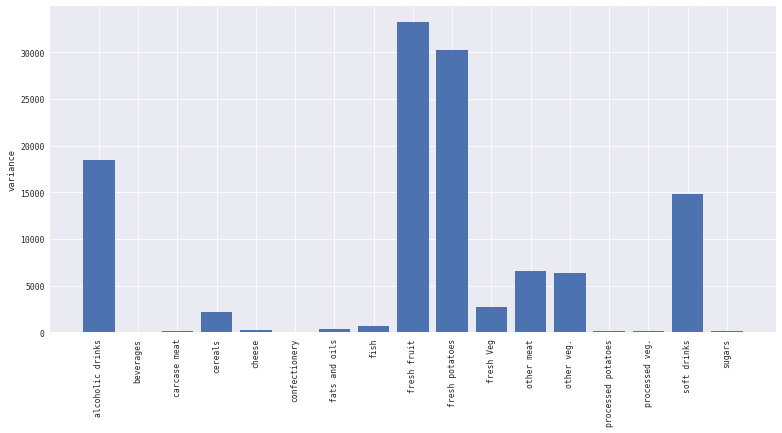

In [4]:
names_features     = df_raw["foods"].values
y_positions        = np.arange(len(names_features))
variances_features = []

for name_feature in names_features:
    variances_features.append(df_raw[df_raw["foods"] == name_feature][["England", "Northern Ireland", "Scotland", "Wales"]].values[0].var())

plt.rcParams["figure.figsize"] = (13, 6)
plt.bar(y_positions, variances_features, align = "center")
plt.xticks(y_positions, names_features, rotation = 90)
plt.ylabel("variance")

plt.show()

# example: PCA on UK food data

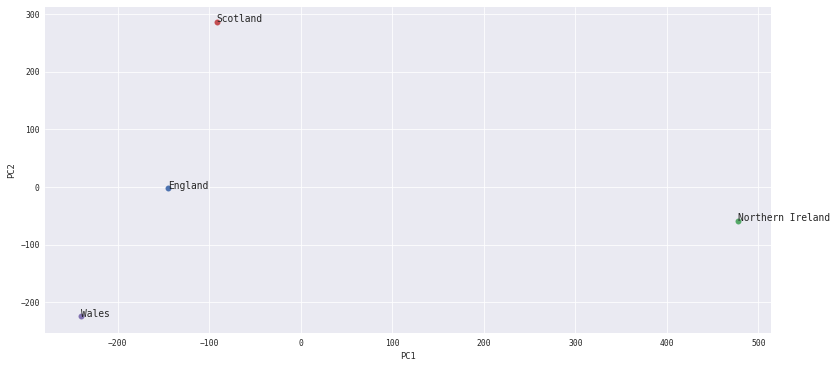

In [5]:
# split data table into data X and class labels y
X = df[df.columns].values
y = df.index.values

Y = sklearn.decomposition.PCA(n_components = 17).fit_transform(X)

for point, label in zip(Y, y):
    plt.scatter(point[0], point[1])
    plt.axes().annotate(label, (point[0], point[1]))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.rcParams["figure.figsize"] = (13, 13)
plt.show()

# t-SNE

t-SNE is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted and interpreted easily by humans. It can create compelling maps from data with hundreds or even thousands of dimensions. t-SNE converts distances between data in the original space to probabilities. t-SNE can help to indicate whether classes are separable in some linear or nonlinear representation.

The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space. The algorithm is nonlinear and adapts to the underlying data, performing different transformations on different regions. The t-SNE algorithm adapts its notion of "distance" to regional density variations in the data. As a result, it expands dense clusters and contracts sparse ones, evening out cluster sizes. This density equalization happens by design and is a predictable feature of t-SNE. The actual distances between clusters might not mean anything.

A feature of t-SNE is a tuneable parameter called "perplexity", which describes how to balance attention between local and global aspects of data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The perplexity should really have a smaller value than the number of points. A plausible approach is to iterate until a stable coniguration is reached.

One rough approach could be to set the perplexity to about 5% of the dataset size. So, for a dataset with 100K cases, an initial perplexity of ~5000 could be set, or at least ~1000 if a high performance computer isn't available.

- [Visualizing Data using t-SNE -- Laurens van der Maaten, Geoffrey Hinton, 2008](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
- [t-SNE examples](http://distill.pub/2016/misread-tsne/)

# example: t-SNE on S-curve dataset

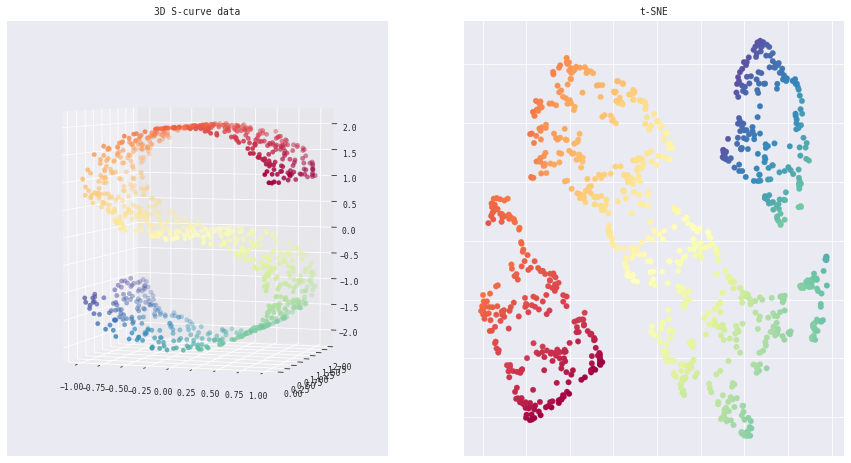

In [6]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import matplotlib.ticker
import sklearn.manifold
import sklearn.datasets
mpl_toolkits.mplot3d.Axes3D

# data
n_points     = 1000
X, color     = sklearn.datasets.samples_generator.make_s_curve(n_points)
n_neighbors  = 10
n_components = 2

fig = plt.figure(figsize = (15, 8))

# 3D plot
ax = fig.add_subplot(1, 2, 1, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = color, cmap = plt.cm.Spectral)
ax.view_init(4, -72)
ax.title.set_text("3D S-curve data")

# t-SNE
Y = sklearn.manifold.TSNE(n_components = n_components, init = "pca").fit_transform(X)

ax = fig.add_subplot(1, 2, 2)
plt.scatter(Y[:, 0], Y[:, 1], c = color, cmap = plt.cm.Spectral)
ax.title.set_text("t-SNE")
ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
plt.axis("tight")
plt.show()

# example: t-SNE on UK food data

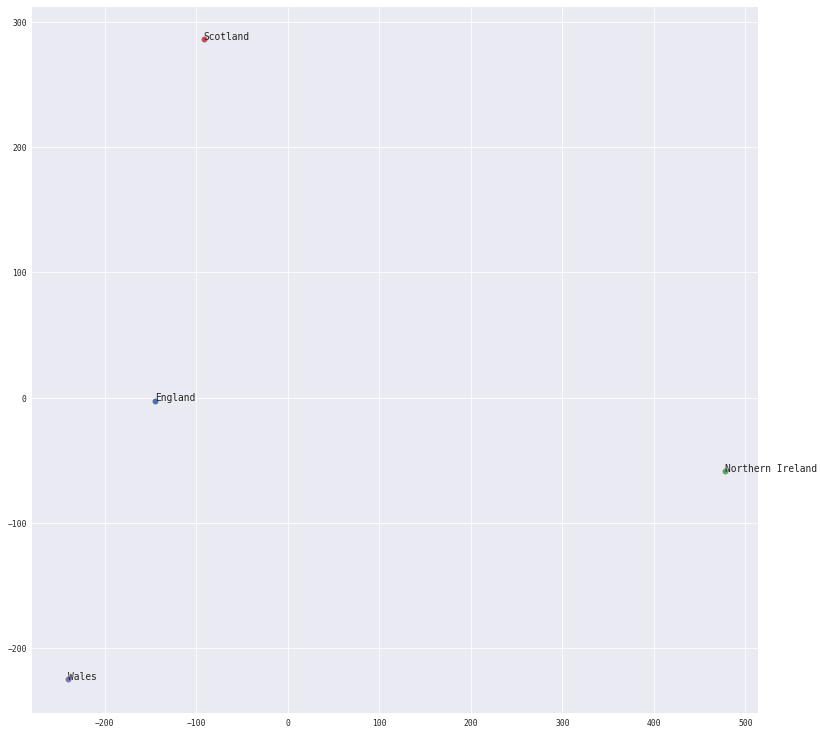

In [7]:
# split data table into data X and class labels y
X = df[df.columns].values
y = df.index.values

Y = sklearn.manifold.TSNE(
    n_components = 4,
    init         = "pca",
    method       = "barnes_hut"
).fit_transform(X)

for point, label in zip(Y, y):
    plt.scatter(point[0], point[1])
    plt.axes().annotate(label, (point[0], point[1]))

plt.rcParams["figure.figsize"] = (13, 13)
plt.show()